v7 makes problems:
[Ideal(0.997, -0.071), Ideal(0.799, 0.602), Point(0.039, -0.737)]
[Ideal(0.995, 0.097), Ideal(-0.584, -0.812), Point(-0.437, -0.069)]
k=2

in approx the isCovered fails, multiple intersections with the edge that are not ideal:
[Ideal(0.782, 0.623), Ideal(0.785, -0.62), Ideal(-0.781, -0.624)]

PList = [Point(-0.335, 0.733), Point(0.827, -0.228), Point(-0.755, 0.238)]
k = 1
Tri is CW
Tri is not covered for delta = 0.3


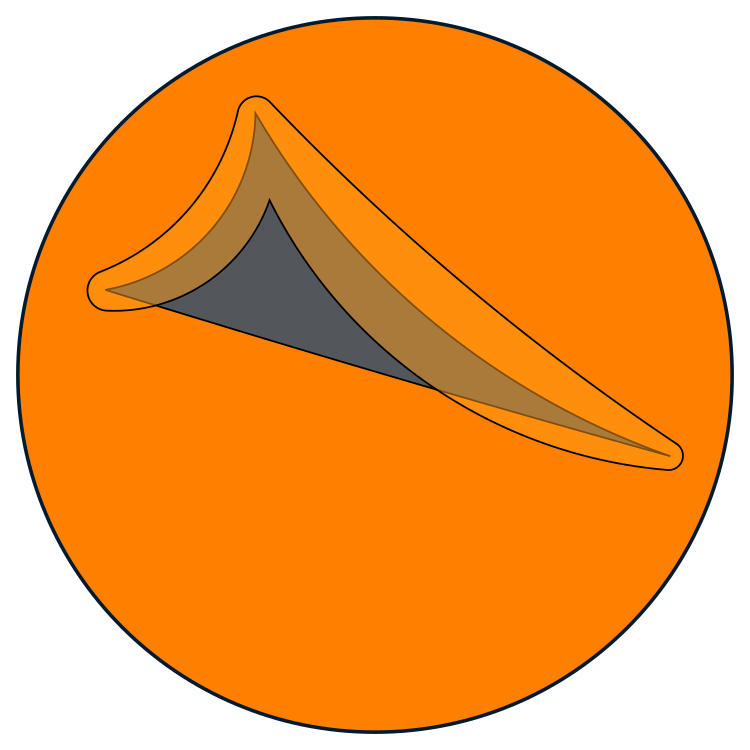

In [44]:
import random
import drawSvg as draw
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import *

d = draw.Drawing(2.1, 2.1, origin='center')
d.setRenderSize(750)
d.append(draw.Circle(0, 0, 1, fill='#ff7f00', stroke_width=0.01, stroke='#001a30'))

PList=randomPoints(3)
#PList=[Ideal.fromDegree(i/3*360) for i in range(2)]

#PList=[Point(-0.381, -0.06), Point(-0.13, 0.123), Point(-0.182, 0.23)]

k=random.randint(0,2)
#k=0
print('PList =', PList)
print('k =', k)

Tri=Triangle.fromVertices(PList)

delta = Tri.approx()
delta=0.3
d.draw(Tri, stroke='black', stroke_width=0.005,  fill='#53565b', fill_opacity=1)
d.draw(deltaNbh(Tri,delta,k), stroke='black',stroke_width=0.005, fill='#ff9e1b', fill_opacity=0.5)


if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isDeltaslim(delta):
    print('Tri is delta-slim for delta =',delta)
else:
    print('Tri is not covered for delta =',delta)

#print(delta)
#print(np.log(1+2**0.5))

d